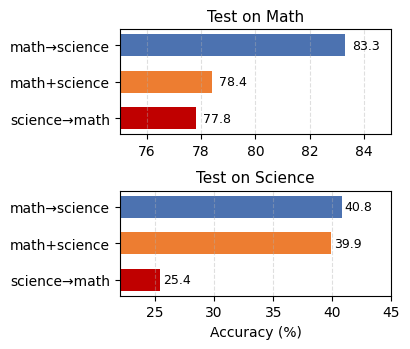

In [42]:
import matplotlib.pyplot as plt

# =========================
# Data (Accuracy %)
# =========================
labels = ["math→science", "math+science", "science→math"]

math_acc = [83.3, 78.4, 77.8]
science_acc = [40.8, 39.9, 25.4]

# =========================
# Colors (ICML-friendly)
# =========================
COLORS = {
    "math→science": "#4C72B0",   # blue
    "math+science": "#ED7D31",             # orange
    "science→math": "#C00000",   # red
}

bar_colors = [COLORS[l] for l in labels]

# =========================
# Global style
# =========================
plt.rcParams.update({
    "font.size": 10,
    "axes.linewidth": 0.8,
})

# =========================
# Figure: vertical layout
# =========================
fig, axes = plt.subplots(2, 1, figsize=(4.2, 3.6), sharex=False)

bar_height = 0.6  # <<<<< 压扁关键参数

# ===== Math (top) =====
ax = axes[0]
y_pos = range(len(labels))

bars = ax.barh(
    y_pos,
    math_acc,
    height=bar_height,
    color=bar_colors
)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # 让 math→science 在最上
ax.set_title("Test on Math", fontsize=11)
# ax.set_xlabel("Accuracy (%)")
ax.set_xlim(75, 85)
ax.grid(axis="x", linestyle="--", alpha=0.4)

for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.25, bar.get_y() + bar.get_height()/2,
            f"{w:.1f}", va="center", fontsize=9)

# ===== Science (bottom) =====
ax = axes[1]
bars = ax.barh(
    y_pos,
    science_acc,
    height=bar_height,
    color=bar_colors
)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_title("Test on Science", fontsize=11)
ax.set_xlabel("Accuracy (%)")
ax.set_xlim(22, 45)
ax.grid(axis="x", linestyle="--", alpha=0.4)

for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.25, bar.get_y() + bar.get_height()/2,
            f"{w:.1f}", va="center", fontsize=9)

plt.tight_layout(h_pad=0.9)
plt.savefig("math_science_asymmetric_transfer_barh.pdf", dpi=600)
plt.show()

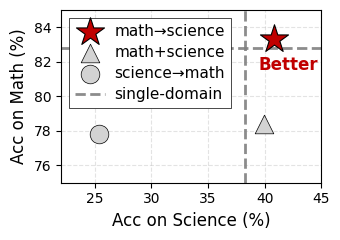

In [37]:
import matplotlib.pyplot as plt

# =========================
# Data
# =========================
labels = ["math→science", "math+science", "science→math"]
math_acc = [83.3, 78.4, 77.8]
science_acc = [40.8, 39.9, 25.4]

# Single-domain baselines
MATH_BASELINE = 82.8
SCIENCE_BASELINE = 38.3

# =========================
# Markers
# =========================
MARKERS = {
    "math→science": "*",
    "math+science": "^",
    "science→math": "o",
}

# =========================
# Global style
# =========================
plt.rcParams.update({
    "font.size": 10,
    "axes.linewidth": 0.8,
    "legend.frameon": False,
})

# =========================
# Scatter plot
# =========================
fig, ax = plt.subplots(figsize=(3.5, 2.5))

for x, y, name in zip(science_acc, math_acc, labels):

    if name == "math→science":
        # Highlight main setting
        ax.scatter(
            x, y,
            s=450,                    # larger star
            marker="*",
            c="#C00000",              # red
            edgecolors="black",
            linewidths=0.8,
            zorder=4,
            label=name
        )
    else:
        # De-emphasize others
        ax.scatter(
            x, y,
            s=180,
            marker=MARKERS[name],
            c="lightgray",
            edgecolors="black",
            linewidths=0.5,
            zorder=2,
            label=name
        )

# =========================
# Annotate "Better" near highlighted point
# =========================
for x, y, name in zip(science_acc, math_acc, labels):
    if name == "math→science":
        ax.text(
            x - 1.3,        # 左移一点
            y - 2,        # 下移一点（适配 math 这张图的尺度）
            "Better",
            fontsize=12,
            color="#C00000",
            fontweight="bold",   # 加粗
            ha="left",
            va="bottom",
            zorder=5
        )

# =========================
# Single-domain baselines
# =========================
ax.axhline(
    MATH_BASELINE,
    color="gray",
    linestyle="--",
    linewidth=2.0,
    alpha=0.9,
    label="single-domain"
)

ax.axvline(
    SCIENCE_BASELINE,
    color="gray",
    linestyle="--",
    linewidth=2.0,
    alpha=0.9
)

# =========================
# Axes & grid
# =========================
ax.set_xlabel("Acc on Science (%)", fontsize=12)
ax.set_ylabel("Acc on Math (%)", fontsize=12)

ax.set_xlim(22, 45)
ax.set_ylim(75, 85)

ax.grid(True, linestyle="--", alpha=0.35, zorder=0)

# =========================
# Legend (ensure highlight first)
# =========================
handles, labels_ = ax.get_legend_handles_labels()
order = [labels_.index("math→science")] + \
        [i for i, l in enumerate(labels_) if l != "math→science"]

leg = ax.legend(
    [handles[i] for i in order],
    [labels_[i] for i in order],
    loc="upper left",
    fontsize=11,
    handletextpad=0.6,
    labelspacing=0.4,
    frameon=True,
    fancybox=False
)

frame = leg.get_frame()
frame.set_linewidth(0.5)
frame.set_edgecolor("black")
frame.set_facecolor("white")
frame.set_alpha(1.0)

# =========================
# Save & show
# =========================
plt.tight_layout()
plt.savefig("math_science_asymmetric_transfer_scatter.pdf", dpi=600)
plt.show()

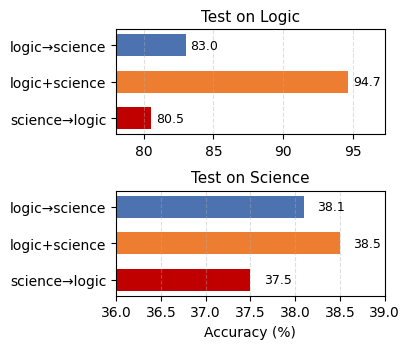

In [6]:
import matplotlib.pyplot as plt

# =========================
# Data (Accuracy %)
# =========================
labels = ["logic→science", "logic+science", "science→logic"]

logic_acc = [83.0, 94.7, 80.5]     # Test on Logic (kk)
science_acc = [38.1, 38.5, 37.5]  # Test on Science

# =========================
# Colors (ICML-friendly)
# =========================
COLORS = {
    "logic→science": "#4C72B0",   # blue
    "logic+science": "#ED7D31",   # orange
    "science→logic": "#C00000",   # red
}

bar_colors = [COLORS[l] for l in labels]

# =========================
# Global style
# =========================
plt.rcParams.update({
    "font.size": 10,
    "axes.linewidth": 0.8,
})

# =========================
# Figure: vertical layout
# =========================
fig, axes = plt.subplots(2, 1, figsize=(4.2, 3.6), sharex=False)

bar_height = 0.6  # 压扁关键参数

y_pos = range(len(labels))

# ===== Logic (top) =====
ax = axes[0]
bars = ax.barh(
    y_pos,
    logic_acc,
    height=bar_height,
    color=bar_colors
)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # logic→science 在最上
ax.set_title("Test on Logic", fontsize=11)
ax.set_xlim(78, 97.3)
ax.grid(axis="x", linestyle="--", alpha=0.4)

for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.35, bar.get_y() + bar.get_height()/2,
            f"{w:.1f}", va="center", fontsize=9)

# ===== Science (bottom) =====
ax = axes[1]
bars = ax.barh(
    y_pos,
    science_acc,
    height=bar_height,
    color=bar_colors
)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_title("Test on Science", fontsize=11)
ax.set_xlabel("Accuracy (%)")
ax.set_xlim(36, 39)
ax.grid(axis="x", linestyle="--", alpha=0.4)

for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.15, bar.get_y() + bar.get_height()/2,
            f"{w:.1f}", va="center", fontsize=9)

plt.tight_layout(h_pad=0.9)
plt.savefig("logic_science_asymmetric_transfer_barh.pdf", dpi=600)
plt.show()

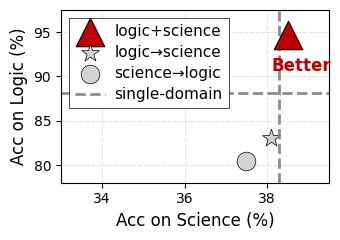

In [30]:
import matplotlib.pyplot as plt

# =========================
# Data
# =========================
labels = ["logic→science", "logic+science", "science→logic"]

logic_acc = [83.0, 94.7, 80.5]     # y-axis
science_acc = [38.1, 38.5, 37.5]  # x-axis

# Single-domain baselines
LOGIC_BASELINE = 88.1
SCIENCE_BASELINE = 38.3

# =========================
# Markers
# =========================
MARKERS = {
    "logic→science": "*",
    "logic+science": "^",
    "science→logic": "o",
}

# =========================
# Global style
# =========================
plt.rcParams.update({
    "font.size": 10,
    "axes.linewidth": 0.8,
})

# =========================
# Scatter plot (highlight logic+science)
# =========================
fig, ax = plt.subplots(figsize=(3.5, 2.5))

for x, y, name in zip(science_acc, logic_acc, labels):

    if name == "logic+science":
        # Highlight main setting
        ax.scatter(
            x, y,
            s=420,                    # larger marker
            marker=MARKERS[name],
            c="#C00000",              # red highlight
            edgecolors="black",
            linewidths=0.8,
            zorder=4,
            label=name
        )
    else:
        # De-emphasize others
        ax.scatter(
            x, y,
            s=180,
            marker=MARKERS[name],
            c="lightgray",
            edgecolors="black",
            linewidths=0.5,
            zorder=2,
            label=name
        )

for x, y, name in zip(science_acc, logic_acc, labels):
    if name == "logic+science":
        ax.text(
            x - 0.4,     # slight right offset
            y - 4.5,      # slight upward offset
            "Better",
            fontsize=12,
            fontweight="bold",   # ← 加粗
            color="#C00000",   
            ha="left",
            va="bottom"
        )

# =========================
# Single-domain baselines
# =========================
ax.axhline(
    LOGIC_BASELINE,
    linestyle="--",
    color="gray",
    linewidth=2.0,
    alpha=0.9,
    label="single-domain"
)

ax.axvline(
    SCIENCE_BASELINE,
    linestyle="--",
    color="gray",
    linewidth=2.0,
    alpha=0.9
)

# =========================
# Axes & grid
# =========================
ax.set_xlabel("Acc on Science (%)", fontsize=12)
ax.set_ylabel("Acc on Logic (%)", fontsize=12)

ax.set_xlim(33, 39.5)
ax.set_ylim(78, 97.5)

ax.grid(True, linestyle="--", alpha=0.35, zorder=0)

# =========================
# Legend (highlight first)
# =========================
handles, labels_ = ax.get_legend_handles_labels()
order = [labels_.index("logic+science")] + \
        [i for i, l in enumerate(labels_) if l != "logic+science"]

leg = ax.legend(
    [handles[i] for i in order],
    [labels_[i] for i in order],
    loc="upper left",
    fontsize=11,
    handletextpad=0.6,
    labelspacing=0.4,
    frameon=True,
    fancybox=False
)

frame = leg.get_frame()
frame.set_linewidth(0.5)
frame.set_edgecolor("black")
frame.set_facecolor("white")
frame.set_alpha(1.0)

# =========================
# Save & show
# =========================
plt.tight_layout()
plt.savefig("logic_science_asymmetric_transfer_scatter.pdf", dpi=600)
plt.show()

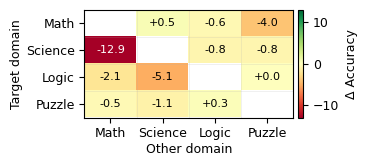

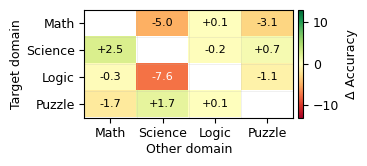

Saved: heatmap_continue.pdf, heatmap_before.pdf


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Domains
# =========================
domains = ["Math", "Science", "Logic", "Puzzle"]
idx = {d: i for i, d in enumerate(domains)}

# =========================
# Δ matrices (Acc_current - Acc_original), in percentage points
# NaN = missing entry (shown as blank)
# =========================
continue_delta = np.full((4, 4), np.nan, dtype=float)
before_delta   = np.full((4, 4), np.nan, dtype=float)

# ---- Continue Training Field (target -> other), evaluated on target test set ----
# Math
continue_delta[idx["Math"],   idx["Science"]] = +0.5
continue_delta[idx["Math"],   idx["Logic"]]   = -0.6
continue_delta[idx["Math"],   idx["Puzzle"]]  = -4.0
# Science
continue_delta[idx["Science"], idx["Math"]]   = -12.9
continue_delta[idx["Science"], idx["Logic"]]  = -0.8
continue_delta[idx["Science"], idx["Puzzle"]] = -0.8
# Logic
continue_delta[idx["Logic"],  idx["Math"]]    = -2.1
continue_delta[idx["Logic"],  idx["Science"]] = -5.1
continue_delta[idx["Logic"],  idx["Puzzle"]] = 0.0
# Puzzle
continue_delta[idx["Puzzle"], idx["Math"]]    = -0.5
continue_delta[idx["Puzzle"], idx["Science"]] = -1.1
continue_delta[idx["Puzzle"], idx["Logic"]] = +0.3

# ---- Before Training Field (other -> target), evaluated on target test set ----
# Math
before_delta[idx["Math"],   idx["Science"]] = -5.0
before_delta[idx["Math"],   idx["Logic"]]   = +0.1
before_delta[idx["Math"],   idx["Puzzle"]]  = -3.1
# Science
before_delta[idx["Science"], idx["Math"]]   = +2.5
before_delta[idx["Science"], idx["Logic"]]  = -0.2
before_delta[idx["Science"], idx["Puzzle"]] = +0.7
# Logic
before_delta[idx["Logic"],  idx["Math"]]    = -0.3
before_delta[idx["Logic"],  idx["Science"]] = -7.6
before_delta[idx["Logic"],  idx["Puzzle"]]  = -1.1
# Puzzle
before_delta[idx["Puzzle"], idx["Math"]]    = -1.7
before_delta[idx["Puzzle"], idx["Science"]] = +1.7
before_delta[idx["Puzzle"], idx["Logic"]] = +0.1

# =========================
# Plot style (ICML-ish)
# =========================
plt.rcParams.update({
    "font.size": 9,
    "axes.linewidth": 0.8,
})

# Use the same symmetric color range for BOTH figures
all_vals = np.concatenate([continue_delta.flatten(), before_delta.flatten()])
vmax = float(np.nanmax(np.abs(all_vals)))
vmax = float(np.ceil(vmax))  # clean round number
vmin = -vmax

cmap = plt.cm.RdYlGn.copy()      # negative=red, positive=green
cmap.set_bad(color="white")      # NaN cells are blank/white

def plot_one_heatmap(mat, title, out_pdf, figsize=(4.9, 1.55)):
    """
    figsize is intentionally very flat for ICML figure embedding.
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    im = ax.imshow(mat, vmin=vmin, vmax=vmax, cmap=cmap, aspect="auto")

    # labels
    # ax.set_title(title, fontsize=10, pad=4)
    ax.set_xlabel("Other domain", labelpad=2)
    ax.set_ylabel("Target domain", labelpad=2)

    ax.set_xticks(range(len(domains)))
    ax.set_yticks(range(len(domains)))
    ax.set_xticklabels(domains) # , rotation=20, ha="right"
    ax.set_yticklabels(domains)

    # subtle grid
    ax.set_xticks(np.arange(-.5, len(domains), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(domains), 1), minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.6, alpha=0.22)
    ax.tick_params(which="minor", bottom=False, left=False)

    # annotate Δ values
    for i in range(4):
        for j in range(4):
            val = mat[i, j]
            if np.isnan(val) or i == j:
                continue
            txt = f"{val:+.1f}"
            # contrast: big magnitude -> white, else black
            text_color = "white" if abs(val) >= (0.55 * vmax) else "black"
            ax.text(j, i, txt, ha="center", va="center", fontsize=8, color=text_color)

    # thin colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.04, pad=0.02)
    cbar.set_label("Δ Accuracy", labelpad=4)

    fig.tight_layout(pad=0.15)
    fig.savefig(out_pdf, dpi=600, bbox_inches="tight")
    plt.show()
    plt.close(fig)

# =========================
# Save two separate figures
# =========================
plot_one_heatmap(
    continue_delta,
    "Continue Training (target→other)",
    "draw/fig/heatmap_continue.pdf",
    figsize=(3.5, 1.5)
)

plot_one_heatmap(
    before_delta,
    "Before Training (other→target)",
    "draw/fig/heatmap_before.pdf",
    figsize=(3.5, 1.5)
)

print("Saved: heatmap_continue.pdf, heatmap_before.pdf")

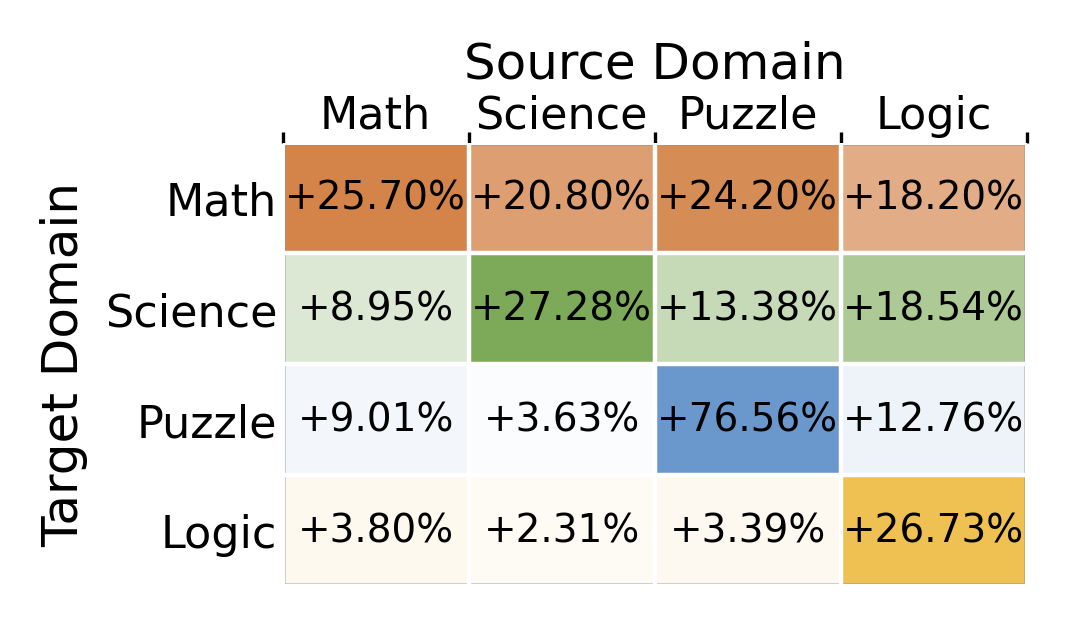

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# -------------------------
# Data & labels (numbers stay unchanged)
# -------------------------
data = np.array([
    [25.7, 20.8, 24.2, 18.2],
    [8.95, 27.28, 13.38, 18.54],
    [9.01, 3.63, 76.56, 12.76],
    [3.80, 2.31, 3.39, 26.73]
], dtype=float)

labels = ["Math", "Science", "Puzzle", "Logic"]

# Base colors (fixed per ROW / test domain)
base_colors = {
    "Math":    np.array([212, 132,  73]) / 255.0,  # #D48449
    "Science": np.array([125, 170,  88]) / 255.0,  # #7DAA58
    "Puzzle":  np.array([106, 152, 204]) / 255.0,  # #6A98CC
    "Logic":   np.array([238, 193,  82]) / 255.0,  # #EEC152
}
white = np.ones(3)

# -------------------------
# Row-wise normalization
# -------------------------
row_max = data.max(axis=1, keepdims=True)
row_ratio = np.divide(data, row_max, out=np.zeros_like(data), where=row_max != 0)

# -------------------------
# Build RGB heatmap (strong contrast)
# -------------------------
GAMMA = 1.2   # ↑ bigger → low values lighter

n = data.shape[0]
rgb = np.zeros((n, n, 3), dtype=float)

for i, row_label in enumerate(labels):
    pure = base_colors[row_label]
    for j in range(n):
        alpha = (row_ratio[i, j]) ** GAMMA
        if i == j:
            alpha = 1.0
        rgb[i, j] = (1 - alpha) * white + alpha * pure

# -------------------------
# Plot (ICML-style)
# -------------------------
plt.rcParams.update({
    "font.size": 8,
    "axes.linewidth": 0.6,
})

fig, ax = plt.subplots(figsize=(2.5, 1.4), dpi=400)
ax.imshow(rgb, aspect="auto", interpolation="nearest")

# ticks on top
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(labels, fontsize=8)
ax.set_yticklabels(labels, fontsize=8)
ax.tick_params(axis="both", which="major", length=0, pad=1)

# axis labels
ax.set_xlabel("Source Domain", fontsize=9, labelpad=3)
ax.set_ylabel("Target Domain", fontsize=9, labelpad=3)

# -------------------------
# Cell grid (white separators)
# -------------------------
ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
ax.grid(which="minor", color="white", linewidth=0.8)
ax.tick_params(which="minor", bottom=False, left=False)

# -------------------------
# ADD OUTER BORDER (关键！！)
# -------------------------
ax.add_patch(
    Rectangle(
        (-0.5, -0.5), n, n,
        fill=False,
        edgecolor="black",
        linewidth=0.8
    )
)

# hide default spines（避免双重边框）
for spine in ax.spines.values():
    spine.set_visible(False)

# -------------------------
# Annotate values (unchanged)
# -------------------------
for i in range(n):
    for j in range(n):
        ax.text(
            j, i,
            f"+{data[i, j]:.2f}%",
            ha="center",
            va="center",
            fontsize=7
        )

fig.tight_layout(pad=0.15)
plt.savefig("motivation.pdf", bbox_inches="tight")
plt.show()

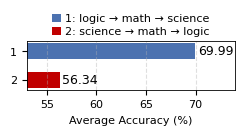

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# =========================
# Data (Average Accuracy %)
# =========================
labels = [
    "logic→math→science",
    "science→math→logic",
]

avg_acc = [69.99, 56.34]

# =========================
# Colors (ICML-friendly)
# =========================
COLORS = ["#4C72B0", "#C00000"]  # blue vs red

# =========================
# Global style
# =========================
plt.rcParams.update({
    "font.size": 8,
    "axes.linewidth": 0.6,
})

# =========================
# Figure (single plot)
# =========================
fig, ax = plt.subplots(figsize=(2.5, 1.4))

y_pos = range(len(labels))
bar_height = 0.55

bars = ax.barh(
    y_pos,
    avg_acc,
    height=bar_height,
    color=COLORS
)

# ===== y-axis: use indices only =====
ax.set_yticks(y_pos)
ax.set_yticklabels(["1", "2"])
ax.invert_yaxis()

ax.set_xlabel("Average Accuracy (%)")
ax.set_xlim(53, 74)
ax.grid(axis="x", linestyle="--", alpha=0.4)

# =========================
# Legend (top, indexed)
# =========================
legend_handles = [
    Patch(facecolor=COLORS[0], label="1: logic → math → science"),
    Patch(facecolor=COLORS[1], label="2: science → math → logic"),
]

ax.legend(
    handles=legend_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, 1.005),   # 更贴近图
    ncol=1,
    frameon=False,
    handlelength=0.8,              # 缩短色块
    handletextpad=0.4,             # 色块-文字间距
    labelspacing=0.25,             # 行间距（关键）
    borderaxespad=0.0              # legend 与 axes 的 padding
)

# =========================
# Value labels
# =========================
for bar in bars:
    w = bar.get_width()
    ax.text(
        w + 0.25,
        bar.get_y() + bar.get_height() / 2,
        f"{w:.2f}",
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.savefig("asymmetric_transfer_avg_barh.pdf", dpi=600, bbox_inches="tight")
plt.show()

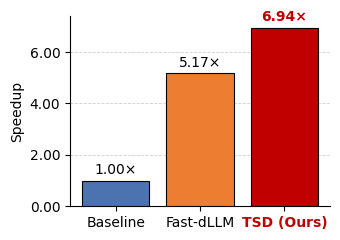

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

# =========================
# Data
# =========================
methods = ["Baseline", "Fast-dLLM", "TSD (Ours)"]
speedup = [1.00, 5.17, 6.94]

x = np.arange(len(methods))

# =========================
# Style (ICML-like)
# =========================
plt.rcParams.update({
    "font.size": 10,
    "axes.linewidth": 0.8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,
    "grid.alpha": 0.6,
})

# Color system (blue / orange / red)
colors = [
    "#4C72B0",  # Baseline
    "#ED7D31",  # Fast-dLLM
    "#C00000",  # TSD (Ours)
]

# =========================
# Plot
# =========================
fig, ax = plt.subplots(figsize=(3.5, 2.5))

bars = ax.bar(
    x,
    speedup,
    color=colors,
    edgecolor="black",
    linewidth=0.8,
    zorder=3,
)

# Grid behind bars
ax.yaxis.grid(True)
ax.set_axisbelow(True)

ax.set_ylabel("Speedup")
ax.set_ylim(0.00, 7.40)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_xticks(x)
ax.set_xticklabels(methods)

# Highlight ours: x-tick label in red
for tick_label, method in zip(ax.get_xticklabels(), methods):
    if method == "TSD (Ours)":
        tick_label.set_color("#C00000")
        tick_label.set_fontweight("bold")

# Value labels
for i, bar in enumerate(bars):
    is_ours = methods[i] == "TSD (Ours)"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.15,
        f"{speedup[i]:.2f}×",
        ha="center",
        va="bottom",
        color="#C00000" if is_ours else "black",
        fontweight="bold" if is_ours else "normal",
    )

plt.tight_layout()
plt.savefig("gsm8k_llada_speedup.pdf", dpi=300, bbox_inches="tight")
plt.show()

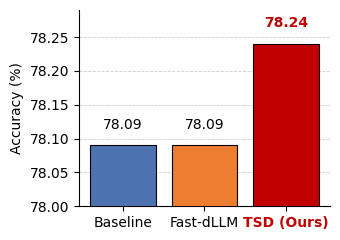

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Data
# =========================
methods = ["Baseline", "Fast-dLLM", "TSD (Ours)"]
score = [78.09, 78.09, 78.24]

x = np.arange(len(methods))

# =========================
# Style (ICML-like)
# =========================
plt.rcParams.update({
    "font.size": 10,
    "axes.linewidth": 0.8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,
    "grid.alpha": 0.6,
})

# Same color system as speedup
colors = [
    "#4C72B0",  # Baseline - blue
    "#ED7D31",  # Fast-dLLM - orange
    "#C00000",  # TSD (Ours) - red
]

# =========================
# Plot
# =========================
fig, ax = plt.subplots(figsize=(3.5, 2.5))  # ICML single-column width

bars = ax.bar(
    x,
    score,
    color=colors,
    edgecolor="black",
    linewidth=0.8,
    zorder=3,
)

# Grid behind bars
ax.yaxis.grid(True)
ax.set_axisbelow(True)

ax.set_ylabel("Accuracy (%)")
ax.set_ylim(78.0, 78.29)
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Highlight ours: x-tick label in red
for tick_label, method in zip(ax.get_xticklabels(), methods):
    if method == "TSD (Ours)":
        tick_label.set_color("#C00000")
        tick_label.set_fontweight("bold")

# Value labels
for i, bar in enumerate(bars):
    is_ours = methods[i] == "TSD (Ours)"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,
        f"{score[i]:.2f}",
        ha="center",
        va="bottom",
        color="#C00000" if is_ours else "black",
        fontweight="bold" if is_ours else "normal",
    )

plt.tight_layout()
plt.savefig("gsm8k_llada_score.pdf", dpi=300, bbox_inches="tight")
plt.show()